### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

In [166]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,tickets=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        self.bilhetes = tickets
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    
def tempExec(self,tempoTermino):
    return tempoTermino - self.chegada

In [266]:
class loteria(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[],total_tickets=50):
        self.prontos = vprontos #processos que chegam ao tempo zero
        self.total_tickets = total_tickets
        self._total_tickets_aux = total_tickets
        self.prontos.sort(key=lambda a: a.bilhetes, reverse=True)

    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo)
        self.prontos.sort(key=lambda a: a.bilhetes, reverse=True)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        # sorteiar o novo bilhete - o proximo processo a ser executado
        total = 0
        number = random.randint(0, self._total_tickets_aux-1)
#         print("total tickets aux: ",self._total_tickets_aux)
        for i in range(len(self.prontos)):
            total += self.prontos[i].bilhetes
            if (number <= total):
#                 print("processo: ",self.prontos[i].nome)
#                 print("sorteio: ", number)
#                 print("total: ", total)
                return self.prontos.pop(i)

        return None

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [70]:
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([3,3,3,3])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos

In [190]:
x = [] # job length
y = [] # U

In [212]:
# LOTERIA
# 1
# nprocs = 2
# nomes = ['P1', 'P2']
# chanceio = [0,0]
# tamanho = np.array([25,75])
# tickets = np.array([100,1])

# total = 100

# quantum = 5
# tempo = 0

# 2
# nprocs = 2
# nomes = ['P1', 'P2']
# chanceio = [0,0]
# tamanho = np.array([100,100])
# tickets = np.array([100,100])

# total = tamanho.sum()

# quantum = 100
# tempo = 0

# 3
nprocs = 2
nomes = ['P1', 'P2']
chanceio = [0,0]
tamanho = np.array([100,110])
tickets = np.array([100,100])

total = tamanho.sum()
x.append(total)

quantum = 2
tempo = 0

# -----------------

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0,tickets[i]))

escLot = loteria(procs)

tempoExec = []

Na célula abaixo, temos o mesmo simulador do laboratório anterior:

In [213]:
# random.seed(0)

while total>0:
    p = escLot.proximo()
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if(p.tam>0):
            escLot.pronto(p)
        total-=rodou
        tempo+=rodou
        if (p.tam == 0):
            print("Tempo execucao - ", p.nome,": ", tempExec(p, tempo))
            tempoExec.append(tempExec(p, tempo))
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1


y.append(tempoExec[0]/tempoExec[1])

P1  rodou por  2  timeslice, faltam  98
P2  rodou por  2  timeslice, faltam  108
P1  rodou por  2  timeslice, faltam  96
P2  rodou por  2  timeslice, faltam  106
P1  rodou por  2  timeslice, faltam  94
P2  rodou por  2  timeslice, faltam  104
P1  rodou por  2  timeslice, faltam  92
P2  rodou por  2  timeslice, faltam  102
P1  rodou por  2  timeslice, faltam  90
P2  rodou por  2  timeslice, faltam  100
P1  rodou por  2  timeslice, faltam  88
P2  rodou por  2  timeslice, faltam  98
P1  rodou por  2  timeslice, faltam  86
P2  rodou por  2  timeslice, faltam  96
P1  rodou por  2  timeslice, faltam  84
P2  rodou por  2  timeslice, faltam  94
P1  rodou por  2  timeslice, faltam  82
P2  rodou por  2  timeslice, faltam  92
P1  rodou por  2  timeslice, faltam  80
P2  rodou por  2  timeslice, faltam  90
P1  rodou por  2  timeslice, faltam  78
P2  rodou por  2  timeslice, faltam  88
P1  rodou por  2  timeslice, faltam  76
P2  rodou por  2  timeslice, faltam  86
P1  rodou por  2  timeslice, faltam

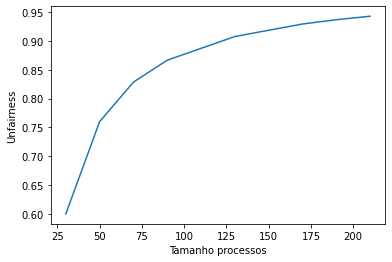

In [214]:
plt.plot(x,y)
plt.ylabel('Unfairness')
plt.xlabel('Tamanho processos')
plt.show()

Nesta, temos um simulador avançado, com E/S e novos processos chegando em momentos diferentes:

In [269]:
maximo = 10
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10

total = 0

contaProc = 1
tempo = 0

quantum = 2
tempoBloq = 2

# escLot = loteria([])
bloqueados = []

# ----------------

nprocs = 3
nomes = ['P1', 'P2', 'P3']
chanceio = [random.randint(1,chanceIo),random.randint(1,chanceIo),random.randint(1,chanceIo)]
tamanho = np.array([10,10,10])
tickets = np.array([10,20,50])

total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0,tickets[i]))

escLot = loteria(procs)

In [270]:
#descomente essa linha caso queira que os random sempre dêem o mesmo resultado
#random.seed(0)

while tempo<maximo or len(escLot.prontos)>0:
    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo não chegar no máximo
#     if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
#         tam = random.randint(minTime,maxTime)
#         p = Processo('P'+str(contaProc),random.randint(1,chanceIo),tam,0,tempo)
#         total += tam
#         print("Processo",p.nome," chegou no tempo",tempo)
#         escLot.pronto(p)
#         contaProc+=1
        

    p = escLot.proximo()
    
    if(p is not None):
        rodou, fezio = p.roda(quantum)
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escLot.pronto(p)
        total-=rodou
        tempo+=rodou
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escLot.pronto(i[0])
                del i  

P3  rodou por  2  timeslice, faltam  8
P3  rodou por  2  timeslice, faltam  6
P3  rodou por  2  timeslice, faltam  4
P3  fez e/s, falta  3
P2  fez e/s, falta  9
P3  rodou por  2  timeslice, faltam  1
P3  rodou por  1  timeslice, faltam  0
P2  fez e/s, falta  8
P2  rodou por  2  timeslice, faltam  6
P2  fez e/s, falta  5
P1  rodou por  2  timeslice, faltam  8
P2  fez e/s, falta  4
P1  fez e/s, falta  7
P2  rodou por  2  timeslice, faltam  2
P2  rodou por  2  timeslice, faltam  0
P1  rodou por  2  timeslice, faltam  5
P1  rodou por  2  timeslice, faltam  3
P1  rodou por  2  timeslice, faltam  1
P1  fez e/s, falta  0


### Laboratório: ###

Neste laboratório vocês (em duplas) irão implementar 3 escalonadores:

1 - MLFQ: Adicione parâmetros para definir o número de filas, o quantum de cada uma e o tempo de boost.

2 - Loteria: tem um atributo `prioridade` no Processo, use ele para definir um número aleatório de bilhetes, similar ao que ocorre com e/s e outros parämetros

3 - Stride: Similar ao loteria.



## Responda ##

#### Sobre Loteria: ####

1 - Rode a simulação mais simples com apenas dois processos, um com 100 tickets e outro com 1, com tempo 100 para terminar. O que aconteceu? O segundo processo conseguiu rodar alguma vez? Testando com outras sementes o resultado se manteve?

2 - Rode a simulação simples com dois processos com 100 tickets e 100 timeslices. Calcule a Unfairness para quantum=2. Repita a operação para quantum 10, 20, 50 e 100. O que aconteceu?

3 - Rode novamente dois processos com 100 tickets no simulador simples e quantum=2. Calcule a unfairness conforme o tamanho dos processos aumenta e faça um gráfico similar ao dos slides.

4 - Rode o simulador maior com três tipos de processo possíveis: um com 10 tickets, um com 20 e um com 50. O que aconteceu com os que receberam menos tickets? Eles tiveram chance de rodar?

1 - O processo com 100 tickets rodou mais vezes que o com o 1; obedeceu a proporção dos workloads mas dando preferência para quem possuia mais tickets. Sim. Sim.

2 - Quanto maior o valor do quantum, menor o valor de U, logo, mais "injusto", pois os tempos de execução estão mais distantes um do outro.

3 - Gráfico mais acima. 

4 - Rodaram somente depois dos mais prioritários rodarem. Sim.

#### Sobre Stride ####

1 - Repita o cenário da 2 de loteria e faça um novo gráfico.

2 - No simulador maior, qual o efeito que ter muitos processos fazendo E/S tem no algoritmo? O que pode ser feito com a posição do processo quando ele volta de E/S?

3 - No simulador maior, rode um cenário igual para stride e loteria (com a mesma semente aleatória) e calcule tempo de resposta, de execução e __tempo de espera__ (tempo que o processo passou pronto). O que mudou entre os dois?

#### Sobre MLFQ ####

1 - Rode o MLFQ no segundo simulador com duas filas e sem boost. O que aconteceu? 

2 - Quais configurações de parâmetros transformam o MLFQ no Round Robin?

3 - Rodando no primeiro simulador, faça 1 dos quatro processos ser 100\% CPU-Bound e os outros três 60\% I/O Bound. Use a configuração com 3 filas, com 5, 3 e 1 timeslices para as fila em ordem de priorida. De quanto tempo deve ser o Boost para que o processo CPU-Bound não sofra starvation e tenha CPU 1 vez a cada 20 timeslices?

4 - Teste diversas configurações de número de filas, quantum das filas e boost no simulador maior e ache a que leva ao melhor tempo de execução.